In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv("Dataset-Mental-Disorders.csv")

In [158]:
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [159]:
df = df.drop(columns=["Patient Number"])

In [160]:
column_names = list(df.columns)
print(column_names)

['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim', 'Expert Diagnose']


In [161]:
for col in column_names:
    print(col, ":", df[col].isna().sum())

Sadness : 0
Euphoric : 0
Exhausted : 0
Sleep dissorder : 0
Mood Swing : 0
Suicidal thoughts : 0
Anorxia : 0
Authority Respect : 0
Try-Explanation : 0
Aggressive Response : 0
Ignore & Move-On : 0
Nervous Break-down : 0
Admit Mistakes : 0
Overthinking : 0
Sexual Activity : 0
Concentration : 0
Optimisim : 0
Expert Diagnose : 0


In [162]:
for col in column_names:
    print("Unique values in ",col,":", df[col].unique())

Unique values in  Sadness : ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Unique values in  Euphoric : ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Unique values in  Exhausted : ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Unique values in  Sleep dissorder : ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Unique values in  Mood Swing : ['YES' 'NO']
Unique values in  Suicidal thoughts : ['YES ' 'YES' 'NO']
Unique values in  Anorxia : ['NO' 'YES']
Unique values in  Authority Respect : ['NO' 'YES']
Unique values in  Try-Explanation : ['YES' 'NO']
Unique values in  Aggressive Response : ['NO' 'YES']
Unique values in  Ignore & Move-On : ['NO' 'YES']
Unique values in  Nervous Break-down : ['YES' 'NO']
Unique values in  Admit Mistakes : ['YES' 'NO']
Unique values in  Overthinking : ['YES' 'NO']
Unique values in  Sexual Activity : ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']
Unique values in  Concentration : ['3 From 10' '2 From

In [163]:
df["Suicidal thoughts"] = df["Suicidal thoughts"].replace('YES ', 'YES')

In [164]:
df["Sexual Activity"] = df["Sexual Activity"].str.split(" ").str[0]
df["Concentration"] = df["Concentration"].str.split(" ").str[0]
df["Optimisim"] = df["Optimisim"].str.split(" ").str[0]

In [165]:
df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


In [166]:
for col in column_names:
    print("Frequency of Values in ", col)
    print(df[col].value_counts())
    print("----------------------")

Frequency of Values in  Sadness
Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64
----------------------
Frequency of Values in  Euphoric
Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64
----------------------
Frequency of Values in  Exhausted
Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: count, dtype: int64
----------------------
Frequency of Values in  Sleep dissorder
Sleep dissorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: count, dtype: int64
----------------------
Frequency of Values in  Mood Swing
Mood Swing
NO     63
YES    57
Name: count, dtype: int64
----------------------
Frequency of Values in  Suicidal thoughts
Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64
----------------------
Frequency of Values in  Anorxia
Anorxia
NO     74
YES    46
Name: count, dtype: int64
--------------------

In [167]:
for col in column_names:
    print("Unique values in ",col,":", df[col].unique())

Unique values in  Sadness : ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Unique values in  Euphoric : ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Unique values in  Exhausted : ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Unique values in  Sleep dissorder : ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Unique values in  Mood Swing : ['YES' 'NO']
Unique values in  Suicidal thoughts : ['YES' 'NO']
Unique values in  Anorxia : ['NO' 'YES']
Unique values in  Authority Respect : ['NO' 'YES']
Unique values in  Try-Explanation : ['YES' 'NO']
Unique values in  Aggressive Response : ['NO' 'YES']
Unique values in  Ignore & Move-On : ['NO' 'YES']
Unique values in  Nervous Break-down : ['YES' 'NO']
Unique values in  Admit Mistakes : ['YES' 'NO']
Unique values in  Overthinking : ['YES' 'NO']
Unique values in  Sexual Activity : ['3' '4' '6' '5' '7' '8' '9' '2' '1']
Unique values in  Concentration : ['3' '2' '5' '4' '7' '6' '1' '8']
Unique values in  Optimisim : ['4' '5' '7' '2' '6' '9' '3' '8' '1'

In [168]:
ordinal_f = ["Sadness", "Euphoric", "Exhausted", "Sleep dissorder"]
binary_f = ["Mood Swing", "Suicidal thoughts", "Anorxia", "Authority Respect", "Try-Explanation", "Aggressive Response", "Ignore & Move-On", "Nervous Break-down", "Admit Mistakes", "Overthinking"]
numerical_f = ["Sexual Activity", "Concentration", "Optimisim"]

In [169]:
ordinal_mapping = {'Seldom':1, 'Sometimes':2, 'Usually':3, 'Most-Often':4}
binary_mapping = {'NO':0, 'YES':1}

In [170]:
for col in ordinal_f:
     df[col] = df[col].map(ordinal_mapping)

In [171]:
for col in binary_f:
    df[col] = df[col].map(binary_mapping)

In [172]:
lbenc = LabelEncoder()

df["Expert Diagnose"] = lbenc.fit_transform(df["Expert Diagnose"])

In [173]:
dict(zip(range(len(lbenc.classes_)),lbenc.classes_))

{0: 'Bipolar Type-1', 1: 'Bipolar Type-2', 2: 'Depression', 3: 'Normal'}

In [174]:
df.cov()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Sadness,0.854622,-0.467227,0.287395,0.123950,-0.011345,0.123109,-0.002521,-0.107983,-0.036555,-0.091597,0.012605,0.074790,-0.062605,0.060924,-0.596218,-0.306723,-0.813445,0.019748
Euphoric,-0.467227,0.852661,-0.335574,-0.078431,-0.035294,-0.119328,0.000560,0.118768,0.023529,0.057703,-0.064426,-0.040896,0.016246,-0.022409,0.554062,0.159664,0.762465,0.026891
Exhausted,0.287395,-0.335574,1.040896,0.362745,-0.017647,0.125210,-0.009524,-0.023249,-0.000840,-0.123810,0.019608,0.064986,0.013725,0.082633,-0.364426,0.050420,-1.045938,0.009244
Sleep dissorder,0.123950,-0.078431,0.362745,0.956232,0.074580,0.133403,0.108543,-0.071779,0.032563,-0.038515,-0.016106,0.063725,-0.050770,0.026961,-0.241947,-0.224790,-0.560224,-0.276261
Mood Swing,-0.011345,-0.035294,-0.017647,0.074580,0.251471,0.041387,0.051681,-0.011134,0.016176,0.062605,-0.031513,0.055042,-0.042227,0.001050,0.048109,-0.346639,0.062185,-0.444748
Suicidal thoughts,0.123109,-0.119328,0.125210,0.133403,0.041387,0.251471,0.034874,-0.027941,0.024580,-0.021429,0.010504,0.038235,-0.008613,0.017857,-0.195588,-0.119748,-0.341176,-0.133824
Anorxia,-0.002521,0.000560,-0.009524,0.108543,0.051681,0.034874,0.238375,-0.008543,0.026471,0.048459,-0.009804,0.035574,-0.038796,0.009104,0.167087,-0.071429,-0.029132,-0.127311
Authority Respect,-0.107983,0.118768,-0.023249,-0.071779,-0.011134,-0.027941,-0.008543,0.240266,-0.044748,-0.031232,0.062325,-0.010784,0.041106,-0.003852,-0.124860,0.094538,0.042577,0.128782
Try-Explanation,-0.036555,0.023529,-0.000840,0.032563,0.016176,0.024580,0.026471,-0.044748,0.251471,-0.004622,-0.023109,0.013025,-0.025420,-0.007353,0.216176,-0.086134,-0.021849,-0.032983
Aggressive Response,-0.091597,0.057703,-0.123810,-0.038515,0.062605,-0.021429,0.048459,-0.031232,-0.004622,0.251821,-0.035014,0.008683,-0.004342,-0.003501,0.361204,-0.079832,0.276751,-0.197059


In [175]:
X = df[['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration', 'Optimisim']]
y = df['Expert Diagnose']

In [176]:
def train_models(X, y):
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.33, random_state = 42)
    
    rfc = RandomForestClassifier()
    gbc = GradientBoostingClassifier()
    logreg = LogisticRegression(solver="sag", max_iter=1000)
    svc = SVC()
    mlpc = MLPClassifier()
    lda = LinearDiscriminantAnalysis()

    models = [rfc, gbc, logreg, svc, mlpc, lda]

    for model in models:
        print("working with: ", model)
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        print("Model Score: ", model.score(xtest, ytest))
        print("Accuracy:", accuracy_score(ytest, ypred))
        print("Precision:", precision_score(ytest, ypred, average="macro"))
        print("Recall:", recall_score(ytest, ypred, average="macro"))
        print("f1 Score:", f1_score(ytest, ypred, average="macro"))
        print("----------------------------------------")
    
    return models

In [177]:
get_models = train_models(X, y)

working with:  RandomForestClassifier()


Model Score:  0.75
Accuracy: 0.75
Precision: 0.7499999999999999
Recall: 0.7715617715617715
f1 Score: 0.7499054541725156
----------------------------------------
working with:  GradientBoostingClassifier()
Model Score:  0.75
Accuracy: 0.75
Precision: 0.7535714285714286
Recall: 0.7550782550782551
f1 Score: 0.7521319638966697
----------------------------------------
working with:  LogisticRegression(max_iter=1000, solver='sag')
Model Score:  0.725
Accuracy: 0.725
Precision: 0.7381493506493506
Recall: 0.7358474858474859
f1 Score: 0.7347619047619047
----------------------------------------
working with:  SVC()
Model Score:  0.7
Accuracy: 0.7
Precision: 0.703327922077922
Recall: 0.6931401931401932
f1 Score: 0.687037037037037
----------------------------------------
working with:  MLPClassifier()
Model Score:  0.725
Accuracy: 0.725
Precision: 0.7381493506493506
Recall: 0.7358474858474859
f1 Score: 0.7347619047619047
----------------------------------------
working with:  LinearDiscriminantAna

c:\Users\anike\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [178]:
rfc_feature_importances = get_models[0].feature_importances_
gbc_feature_importances = get_models[1].feature_importances_
print("rfc: ",rfc_feature_importances)
print("gbc: ",gbc_feature_importances)

rfc:  [0.07557239 0.05544881 0.04812046 0.03655741 0.2634311  0.04425822
 0.01589588 0.04932259 0.01097508 0.02849938 0.0225265  0.0283934
 0.01526599 0.01204651 0.11139804 0.03991431 0.14237395]
gbc:  [1.46440513e-01 3.28373116e-02 2.45186170e-02 5.41204949e-03
 3.26220354e-01 7.01033403e-02 3.22042999e-04 1.65244839e-02
 1.85660292e-08 3.91353274e-03 1.28609597e-02 1.84699316e-03
 8.55359329e-04 6.04422450e-04 2.42590570e-01 4.02914959e-03
 1.10920282e-01]


Text(0.5, 1.0, 'Random Forest Feature Importance')

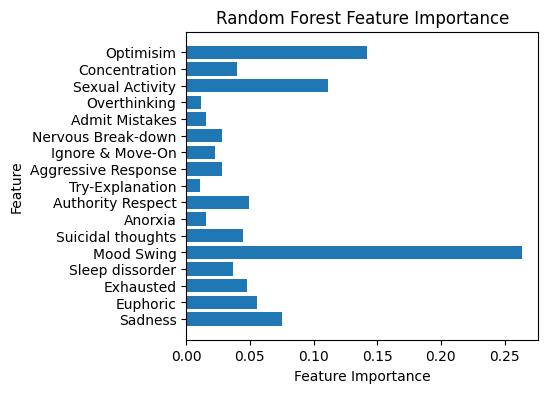

In [179]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.barh(list(X.columns), rfc_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')

Text(0.5, 1.0, 'Gradient Boosting Classifier Feature Importance')

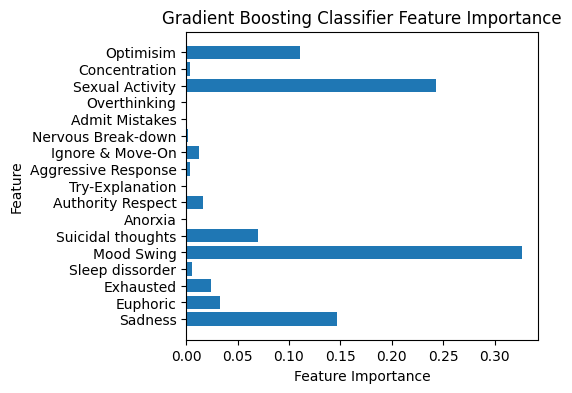

In [180]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.barh(list(X.columns), gbc_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Classifier Feature Importance')

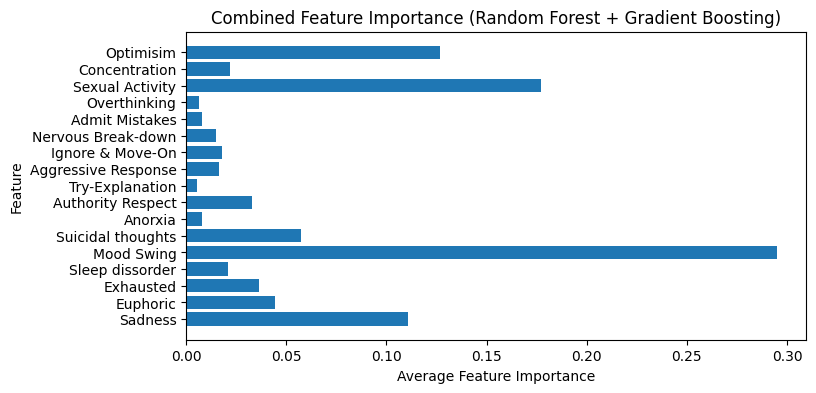

In [181]:
combined_feature_importances = (rfc_feature_importances + gbc_feature_importances)/2

plt.figure(figsize=(8, 4))
plt.barh(list(X.columns), combined_feature_importances)
plt.xlabel('Average Feature Importance')
plt.ylabel('Feature')
plt.title('Combined Feature Importance (Random Forest + Gradient Boosting)')
plt.show()

In [182]:
df.cov()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Sadness,0.854622,-0.467227,0.287395,0.123950,-0.011345,0.123109,-0.002521,-0.107983,-0.036555,-0.091597,0.012605,0.074790,-0.062605,0.060924,-0.596218,-0.306723,-0.813445,0.019748
Euphoric,-0.467227,0.852661,-0.335574,-0.078431,-0.035294,-0.119328,0.000560,0.118768,0.023529,0.057703,-0.064426,-0.040896,0.016246,-0.022409,0.554062,0.159664,0.762465,0.026891
Exhausted,0.287395,-0.335574,1.040896,0.362745,-0.017647,0.125210,-0.009524,-0.023249,-0.000840,-0.123810,0.019608,0.064986,0.013725,0.082633,-0.364426,0.050420,-1.045938,0.009244
Sleep dissorder,0.123950,-0.078431,0.362745,0.956232,0.074580,0.133403,0.108543,-0.071779,0.032563,-0.038515,-0.016106,0.063725,-0.050770,0.026961,-0.241947,-0.224790,-0.560224,-0.276261
Mood Swing,-0.011345,-0.035294,-0.017647,0.074580,0.251471,0.041387,0.051681,-0.011134,0.016176,0.062605,-0.031513,0.055042,-0.042227,0.001050,0.048109,-0.346639,0.062185,-0.444748
Suicidal thoughts,0.123109,-0.119328,0.125210,0.133403,0.041387,0.251471,0.034874,-0.027941,0.024580,-0.021429,0.010504,0.038235,-0.008613,0.017857,-0.195588,-0.119748,-0.341176,-0.133824
Anorxia,-0.002521,0.000560,-0.009524,0.108543,0.051681,0.034874,0.238375,-0.008543,0.026471,0.048459,-0.009804,0.035574,-0.038796,0.009104,0.167087,-0.071429,-0.029132,-0.127311
Authority Respect,-0.107983,0.118768,-0.023249,-0.071779,-0.011134,-0.027941,-0.008543,0.240266,-0.044748,-0.031232,0.062325,-0.010784,0.041106,-0.003852,-0.124860,0.094538,0.042577,0.128782
Try-Explanation,-0.036555,0.023529,-0.000840,0.032563,0.016176,0.024580,0.026471,-0.044748,0.251471,-0.004622,-0.023109,0.013025,-0.025420,-0.007353,0.216176,-0.086134,-0.021849,-0.032983
Aggressive Response,-0.091597,0.057703,-0.123810,-0.038515,0.062605,-0.021429,0.048459,-0.031232,-0.004622,0.251821,-0.035014,0.008683,-0.004342,-0.003501,0.361204,-0.079832,0.276751,-0.197059


In [183]:
X = np.array(X)[1:]
y = np.array(y)[1:]
print(X)
print(y)

[[3 1 3 ... '4' '2' '5']
 [2 4 2 ... '6' '5' '7']
 [3 1 3 ... '3' '2' '2']
 ...
 [3 2 3 ... '1' '5' '3']
 [3 2 1 ... '7' '7' '7']
 [2 3 1 ... '7' '3' '8']]
[2 0 1 3 2 0 3 1 2 3 0 1 3 2 0 3 0 2 3 1 0 3 2 1 3 3 2 1 3 0 2 1 0 3 2 0 1
 3 1 2 1 3 0 2 1 3 1 0 2 3 1 2 0 1 3 0 0 2 3 1 2 0 1 3 2 3 0 1 0 2 1 0 3 1
 2 2 1 3 2 0 1 2 3 0 1 2 0 0 3 2 1 3 0 2 1 0 3 2 1 0 2 0 3 1 2 3 2 1 2 3 1
 0 1 3 2 0 1 2 3]


In [184]:
#Based on current performance status - Random Forest Classifier has the highest accuracy.
rfc = RandomForestClassifier()
rfc.fit(X,y)

RandomForestClassifier()

In [185]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [186]:
ls = [3, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
ls = np.array(ls).reshape(1,-1)

In [188]:
pred = rfc.predict(ls)

In [189]:
pred[0]

1